### 1. Importing packages

In [2]:
from sklearn import metrics
from sklearn.neural_network import MLPClassifier
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sb
%store -r

### 2. Fetching data and setting up datasets

In [3]:
data_train = pd.read_csv("./EMNIST/emnist-balanced-train.csv", header=None)
data_test = pd.read_csv("./EMNIST/emnist-balanced-test.csv", header=None)

cols = ['CHAR']
for i in range(1, 785):
    cols.append(str(i))
data_train.columns = cols
data_test.columns = cols
print(data_train.shape)
print(data_test.shape)

X_train = data_train.iloc[:,1:]
y_train = data_train["CHAR"]
X_test = data_test.iloc[:,1:]
y_test = data_test["CHAR"]
print(X_train.shape)
print(y_train.shape)
print(X_test.shape)
print(y_test.shape)
y_test.head()

(112800, 785)
(18800, 785)
(112800, 784)
(112800,)
(18800, 784)
(18800,)


0    41
1    39
2     9
3    26
4    44
Name: CHAR, dtype: int64

### 3. Modelling

In order to optimize some parameters for the model, we will extract a very small sample from the full testing dataset first and experiment with parameters on it before working with the full testing set.

#### 3.1. Attempt 1

1. Find the optimal number of neurons for one layer, in increment size of 100
2. Find the optimal number of hidden layers, using the optimal number of neurons for one layer as the number of neurons for every layer.

In [ ]:
#num_neurons = [100, 200, 300, 400, 500, 600, 700, 800, 900, 1000, 1100, 1200]
#num_layers = 1
num_neurons = 900
num_layers = [1,2,3,4,5]

accuracies = []

# for num in num_neurons:
for num in num_layers:
    print("Now starting: {} layers".format(num))
    # mlp = MLPClassifier(max_iter=200, hidden_layer_sizes=(num,), random_state=0)
    mlp = MLPClassifier(max_iter=200, hidden_layer_sizes=([num_neurons]*num_layers), random_state=0)
    X_train_small = X_train[:10000]
    y_train_small = y_train[:10000]
    mlp.fit(X_train_small, y_train_small)
    y_pred_tr = mlp.predict(X_train_small)
    y_pred_test = mlp.predict(X_test)
    accuracies.append(metrics.accuracy_score(y_test, y_pred_test))

# evaluation = pd.DataFrame({
#     "num_neurons": num_neurons,
#     "accuracy": accuracies
# })
# evaluation
evaluation = pd.DataFrame({
    "num_layers": num_layers,
    "accuracy": accuracies
})
evaluation

In [ ]:
num_neurons = [100, 200, 300, 400, 500]
#num_layers = [1,2,3,4,5]

accuracies = []

for num in num_neurons:
    print("Now starting: {} neurons".format(num))
    #mlp = MLPClassifier(max_iter=200, hidden_layer_sizes=(num,), random_state=0)
    mlp = MLPClassifier(max_iter=200, hidden_layer_sizes=(900, num,), random_state=0)
#mlp.fit(X_train, y_train)
    X_train_small = X_train[:1000]
    y_train_small = y_train[:1000]
    mlp.fit(X_train_small, y_train_small)
    y_pred_tr = mlp.predict(X_train_small)
    y_pred_test = mlp.predict(X_test)
    accuracies.append(metrics.accuracy_score(y_test, y_pred_test))

# evaluation = pd.DataFrame({
#     "num_neurons": num_neurons,
#     "accuracy": accuracies
# })
# evaluation
evaluation = pd.DataFrame({
    "num_neurons": num_neurons,
    "accuracy": accuracies
})
evaluation

In [8]:
# Ideal layer size analysis - Number of layers is kept constant as 1.
#       num_neurons accuracy
# 0	    100	        0.543564
# 1	    200	        0.613085
# 2	    300	        0.595851
# 3	    400	        0.600904
# 4	    500	        0.604681
# 5	    600	        0.624894
# 6	    700	        0.659894
# 7	    800	        0.646330
# 8	    900	        0.689734 <== Local maximum
# 9	    1000	    0.656011
# 10	1100	    0.672606
# 11	1200	    0.658936

# Ideal number of layers analysis - Number of neurons per layer is kept constant at 900 (as determined by the previous table)
# 	    num_layers  accuracy
# 0	    1	        0.689734
# 1	    2	        0.652181
# 2	    3	        0.700106 <== Local maximum
# 3	    4	        0.677021
# 4	    5	        0.710691 <== would take far too long to train

# Therefore, a MLP with 3 hidden layers and 900 neurons per layer is ideal.
# Of course, it's not actually ideal as varying layer sizes may lead to better results,
# however, I do not have a significant amount of computational power or time to test all possibilities.

In [ ]:
# PLEASE DO NOT OVERWRITE THE MODEL (run if you wish but I shall not do it again)
mlp_trained = MLPClassifier(random_state=0, max_iter=2, hidden_layer_sizes=(900,900,900,), verbose=True)
print("Model created")
mlp_trained.fit(X_train, y_train)
# On a Ryzen 7 5700U, it took 78 minutes to train

In [1]:
# mlp_trained is a saved variable. Layers: (900,900,900), max_iter: 100
# mlp_test is the model generated above
to_test = mlp_trained
# On training dataset
y_pred_train = to_test.predict(X_train)
y_pred_proba_train = to_test.predict_proba(X_train)
accuracy_train = metrics.accuracy_score(y_train, y_pred_train)
loss_train = metrics.log_loss(y_train, y_pred_proba_train)
print("Training Set:")
print(" - Loss: " + str(loss_train))
print(" - Accuracy: " + str(accuracy_train))
# On testing dataset
y_pred = to_test.predict(X_test)
y_pred_proba_test = to_test.predict_proba(X_test)
accuracy_test = metrics.accuracy_score(y_test, y_pred)
loss_test = metrics.log_loss(y_test, y_pred_proba_test)
print("Testing Set")
print(" - Loss: " + str(loss_test))
print(" - Accuracy: " + str(accuracy_test))
# Final result - Training - Accuracy: 0.9301152482269504
# Final result - Training - Accuracy: 0.8181914893617022

NameError: name 'mlp_trained' is not defined

In [ ]:
print(sum(y_pred_proba_test[0]))
print(max(enumerate(y_pred_proba_test[0]), key=lambda x: x[1]))

0.9999999999999999
(41, 0.9999990017750039)


In [28]:
iters = enumerate(mlp_trained.loss_curve_)
min(iters, key=lambda x: x[1])

(68, 0.23139621742202607)

In [40]:
def generate_confusion_matrix(y_true, y_pred):
    # visualize the confusion matrix
    ax = plt.subplot()
    c_mat = metrics.confusion_matrix(y_true, y_pred)
    sb.heatmap(c_mat, annot=False, fmt='g', ax=ax)

    ax.set_xlabel('Predicted labels', fontsize=15)
    ax.set_ylabel('True labels', fontsize=15)
    ax.set_title('Confusion Matrix', fontsize=15)

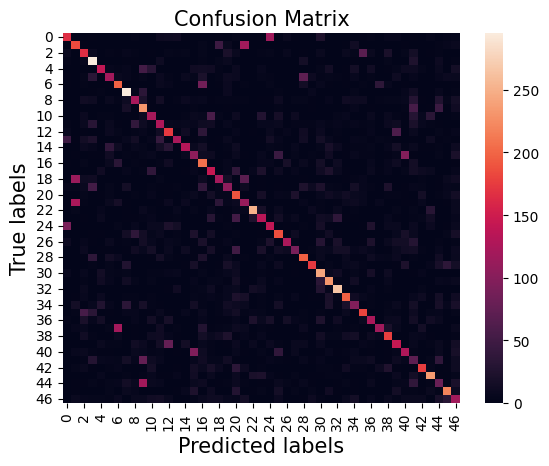

In [21]:
generate_confusion_matrix(y_test, y_pred_test)

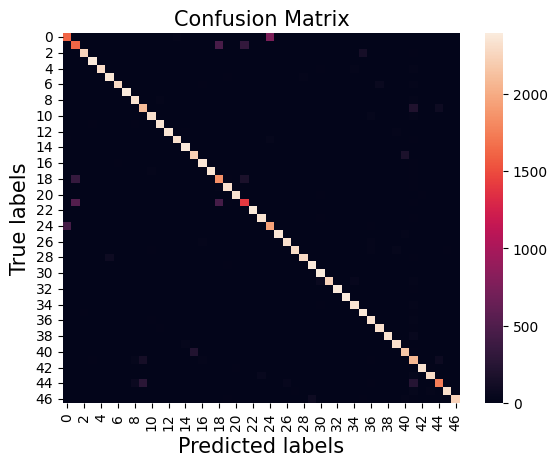

In [13]:
generate_confusion_matrix(y_train, y_pred_train)